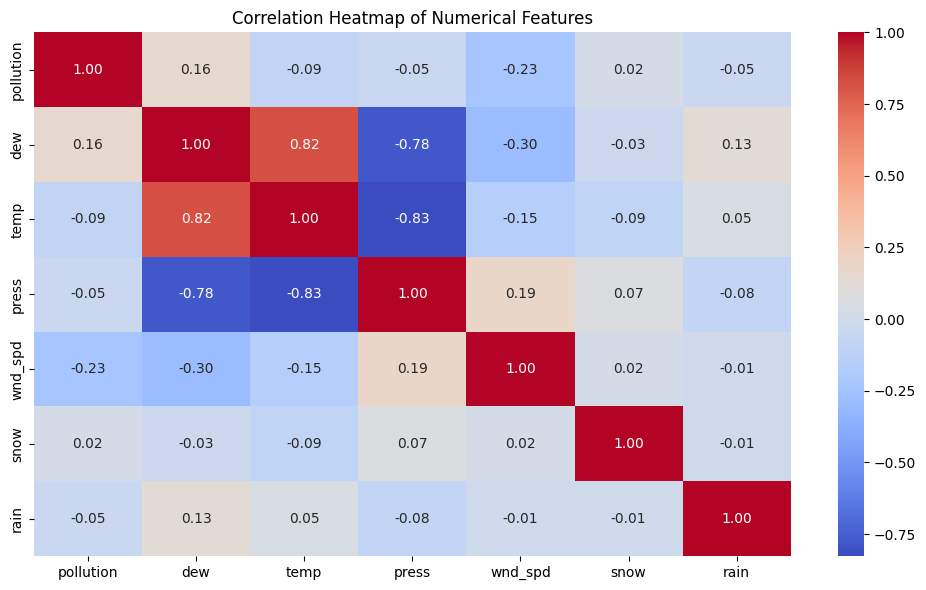

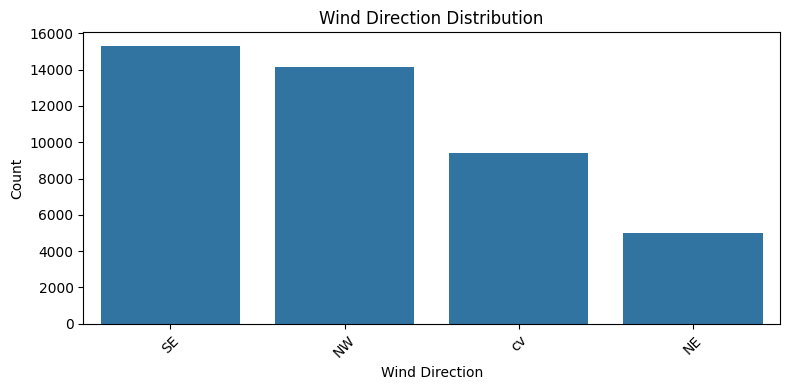

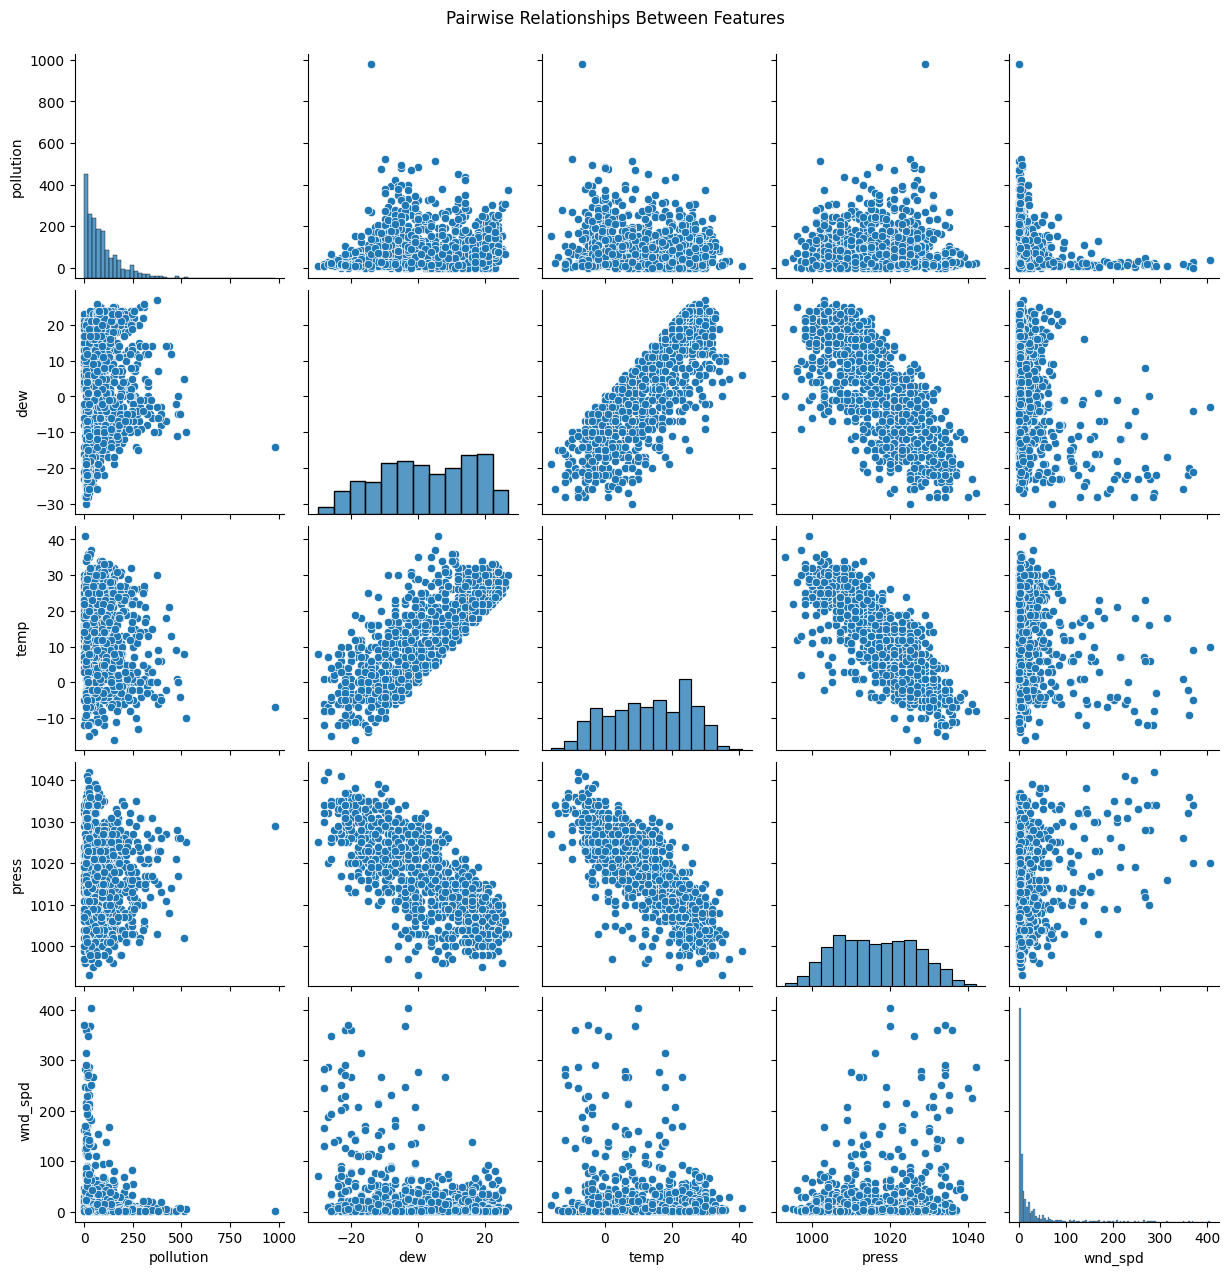

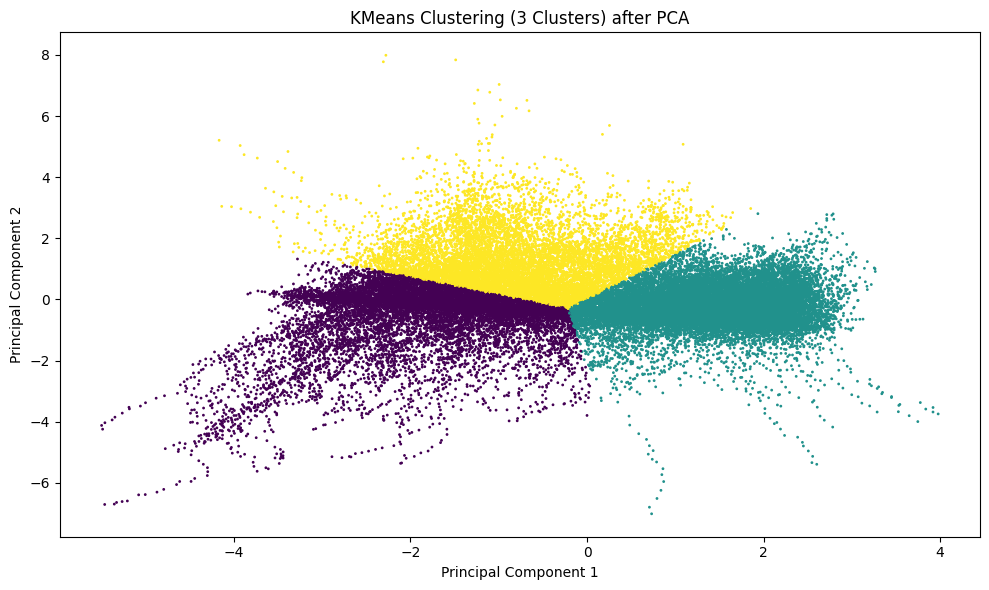

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load and prepare the dataset
df = pd.read_csv('LSTM-Multivariate_pollution.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='wnd_dir').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


# 2. Wind Direction Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='wnd_dir', order=df['wnd_dir'].value_counts().index)
plt.title("Wind Direction Distribution")
plt.ylabel("Count")
plt.xlabel("Wind Direction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Pairwise Feature Plotting
sample_df = df.sample(1000, random_state=42)
sns.pairplot(sample_df[['pollution', 'dew', 'temp', 'press', 'wnd_spd']])
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


# 4. Clustering using KMeans + PCA
# Drop categorical column for clustering
features = df.drop(columns=['wnd_dir'])

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=1)
plt.title("KMeans Clustering (3 Clusters) after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()